<a href="https://colab.research.google.com/github/senshiii/NLP-Spam-Classifier/blob/main/NLP_Spam_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme('notebook') 

In [ ]:
df =  pd.read_csv('SPAM Data.csv')

In [ ]:
print(df.shape)

(5572, 2)


In [ ]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [ ]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

### Adding Length Column

In [ ]:
lengths = []
for value in df.itertuples():
  lengths.append(len(value.Message))
df['length'] = lengths
df.head()

,Category,Message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### Balancing Data

In [ ]:
ham = df[df['Category'] == "ham"]
print(ham.shape)
print(ham.size)
ham.head()

(4825, 3)


,Category,Message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
6,ham,Even my brother is not like to speak with me. ...,77


In [ ]:
spam = df[df['Category'] == "spam"]
print(spam.shape)
spam.head()

(747, 3)


,Category,Message,length
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147
8,spam,WINNER!! As a valued network customer you have...,157
9,spam,Had your mobile 11 months or more? U R entitle...,154
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136


In [ ]:
ham = ham.sample(spam.shape[0])
print(ham.shape)
ham.head()

(747, 3)


,Category,Message,length
3846,ham,Mmmm.... I cant wait to lick it!,32
4467,ham,Hey u still at the gym?,23
740,ham,Haha mayb u're rite... U know me well. Da feel...,149
4412,ham,Ya but it cant display internal subs so i gott...,60
1426,ham,I'll be at mu in like &lt;#&gt; seconds,41


In [ ]:
ham.shape, spam.shape

((747, 3), (747, 3))

In [ ]:
data = ham.append(spam, ignore_index=True)
data.head()

,Category,Message,length
0,ham,Hey you gave them your photo when you register...,87
1,ham,Isn't frnd a necesity in life? imagine urself ...,293
2,ham,"Babe, I'm answering you, can't you see me ? Ma...",109
3,ham,I cant pick the phone right now. Pls send a me...,51
4,ham,I love to cuddle! I want to hold you in my str...,67


### Exploratory Data Analysis

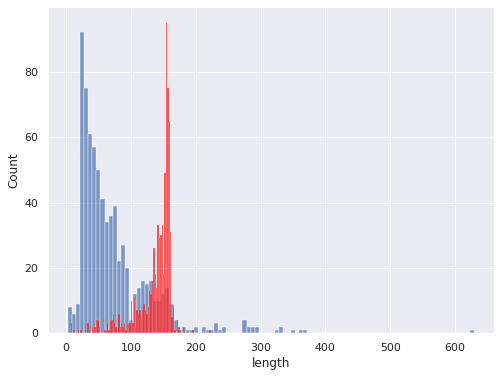

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data[data['Category'] == "ham"]['length'], bins = 100, alpha = 0.7)
sns.histplot(data[data['Category'] == "spam"]['length'], bins = 100, alpha = 0.7, color="red")

### Data Preparation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data['Message'], data['Category'], test_size=0.3, random_state=0, shuffle = True, stratify = data['Category'])

In [ ]:
print(x_train.shape)
x_train

(1045,)


1128    U’ve Bin Awarded £50 to Play 4 Instant Cash. C...
742     Wishing you and your family Merry "X" mas and ...
477     Erm … ill pick you up at about 6.45pm. That'll...
542                      So how's the weather over there?
1277    Ringtone Club: Gr8 new polys direct to your mo...
                              ...                        
1211    Bloomberg -Message center +447797706009 Why wa...
312     Dear Hero,i am leaving to qatar tonite for an ...
268                        I WILL CAL YOU SIR. In meeting
272                 Yo we are watching a movie on netflix
1222    Text BANNEDUK to 89555 to see! cost 150p texto...
Name: Message, Length: 1045, dtype: object

In [ ]:
y_train

1128    spam
742      ham
477      ham
542      ham
1277    spam
        ... 
1211    spam
312      ham
268      ham
272      ham
1222    spam
Name: Category, Length: 1045, dtype: object

In [ ]:
x_test

1127    For ur chance to win a £250 cash every wk TXT:...
421     Its a big difference.  &lt;#&gt;  versus  &lt;...
806     100 dating service cal;l 09064012103 box334sk38ch
547     Jane babes not goin 2 wrk, feel ill after lst ...
61                 Boy you best get yo ass out here quick
                              ...                        
728                                Where r e meeting tmr?
1346    For your chance to WIN a FREE Bluetooth Headse...
376     Do ü all wan 2 meet up n combine all the parts...
296     E admin building there? I might b slightly ear...
1118    Great NEW Offer - DOUBLE Mins & DOUBLE Txt on ...
Name: Message, Length: 449, dtype: object

In [ ]:
y_test

1127    spam
421      ham
806     spam
547      ham
61       ham
        ... 
728      ham
1346    spam
376      ham
296      ham
1118    spam
Name: Category, Length: 449, dtype: object

### Bag of Word Creation

In [ ]:
# vectorizer = TfidfVectorizer()

In [ ]:
# x_train = vectorizer.fit_transform(x_train)

In [ ]:
# print(x_train.shape)
# x_train

### Pipeline and Random Forest Classification

In [ ]:
pipeline = Pipeline([('tfidf', TfidfVectorizer()), ('clf', SVC(C = 1000, gamma = "auto"))]) 

In [ ]:
pipeline.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=1000, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_fun

In [ ]:
y_pred = pipeline.predict(x_test)

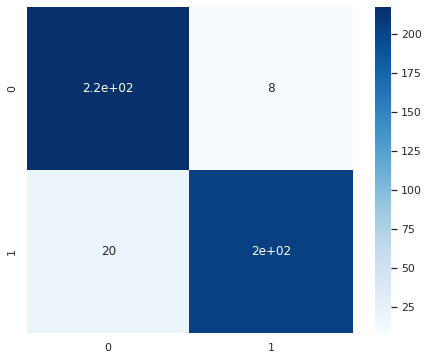

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, square=True, cmap="Blues")

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.92      0.96      0.94       225
        spam       0.96      0.91      0.94       224

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



In [ ]:
accuracy_score(y_test, y_pred).round(4)*100

93.76

In [ ]:
pipeline.predict(["Hi. Whats up ??"])

array(['ham'], dtype=object)